<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_7_Basic_ML_algorithms_part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Юнит 7. Основные алгоритмы машинного обучения. Часть II


## ML-5. Решающие деревья и случайный лес


### 5.2. Решающие деревья

#### Задание 5.2.3
Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная `Class`. Размер тестовой выборки возьмите за ` 0.2, random_state = 17` для разбиения и дерева. Максимальную глубину дерева примите за **3**, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за **2**. Какое значение $\ F1-score $ вы получили? Округлите до трёх знаков после точки-разделителя.

In [ ]:
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/akitim/datasets/main/bill_authentication.csv'
df = pd.read_csv(path)
df.sample(5)

,Variance,Skewness,Curtosis,Entropy,Class
106,2.3136,10.66510,-3.52880,-4.76720,0
238,3.9994,0.90427,1.16930,1.68920,0
1112,-4.1429,2.77490,0.68261,-0.71984,1
866,-4.1409,3.46190,-0.47841,-3.88790,1
1178,-2.0754,1.27670,-0.64206,-1.26420,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

RND_SEED = 17

target = 'Class'
X = df.drop(target, axis=1).values
Y = df[target].values

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size= 0.2, random_state=RND_SEED)

clf_tree = DecisionTreeClassifier(criterion='gini',
                                  max_depth=3,
                                  max_features=2,
                                  random_state=RND_SEED)

clf_tree.fit(X_train, Y_train)

from sklearn.metrics import f1_score

Y_pred = clf_tree.predict(X_test)
print ('f1_score = ', round(f1_score (Y_test, Y_pred), 3))

f1_score =  0.866


#### Задание 5.2.4

Проклассифицируйте банкноту с вектором признаков `2.04378, -0.38422, 1.437292, 0.76421`. К какому классу она относится?

In [ ]:
banknote_sample = np.array([2.04378, -0.38422, 1.437292, 0.76421]).reshape(1, -1)
print ('Предсказанный класс банкноты [2.04378, -0.38422, 1.437292, 0.76421]:',
       clf_tree.predict(banknote_sample)[0])

Предсказанный класс банкноты [2.04378, -0.38422, 1.437292, 0.76421]: 0


#### ПРИМЕР
===================================================

===================================================

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(y_min, y_max, 0.01))

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

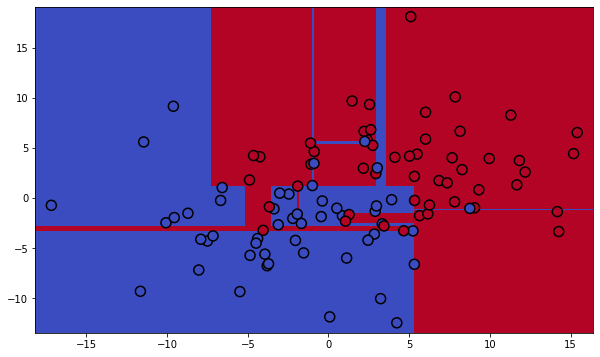

In [ ]:
plt.figure(figsize = (10, 6))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

===================================================

===================================================

#### Задание 5.2.5

Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за `0.3, random_state = 42` для разбиения и дерева. Вычислите ***RMSE***, округлите до двух знаков после точки-разделителя.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

path = 'https://lms.skillfactory.ru/assets/courseware/v1/fc8c2fb45f3b0b86d8fe409ff0f430af/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/petrol_consumption.csv'
df = pd.read_csv(path)

df.sample(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
17,7.0,3718,4725,0.540,714
45,9.0,4476,3942,0.571,510
4,8.0,4399,431,0.544,410
27,7.5,3846,9061,0.579,631
30,7.0,3640,6905,0.518,571


In [ ]:
RND_SEED = 42

target = 'Petrol_Consumption'
X = df.drop(target, axis=1).values
Y = df[target].values

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size= 0.3, random_state=RND_SEED)

tree_regr = DecisionTreeRegressor(random_state=RND_SEED)

tree_regr.fit(X_train, Y_train)
Y_pred = tree_regr.predict(X_test)

RMSE = np.sqrt(1 / Y_test.shape[0] * (Y_pred - Y_test) @ (Y_pred - Y_test))
TD = tree_regr.get_depth()

print('RMSE = ', round(RMSE, 2),
      '\nTree depth = ', TD)

RMSE =  87.97 
Tree depth =  11


#### Задание 5.4.1

На рисунке представлено решающее дерево «Ситуации из жизни» с признаками «количество доступных денег» и «количество времени до важного события».
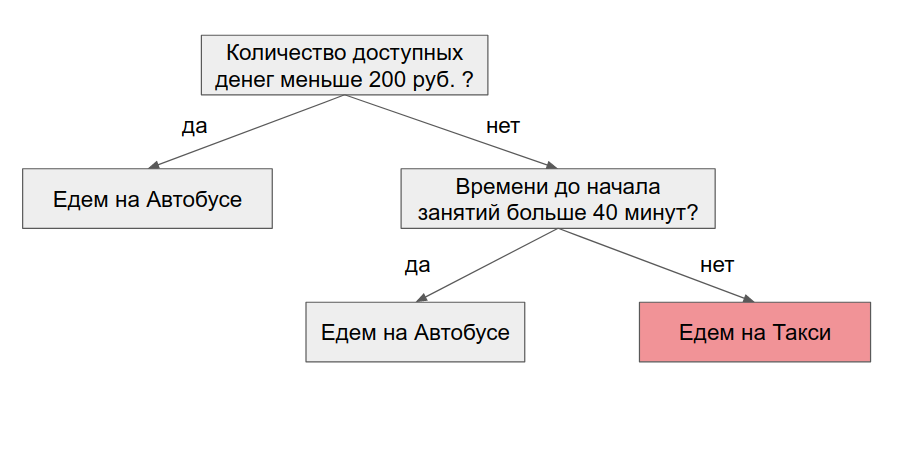
усть дана следующая выборка из пяти объектов (первый признак — деньги, второй — время):

[250, 45]

[100, 35]

[400, 30]

[250, 60]

[300, 50]

Сколько из них попадёт в красный лист?

In [ ]:
class DecisionTree():
    def __init__(self, time, money):
        # self.root = 
        pass
    def create_split(self, node):
        pass

v = np.array([
              [250, 45],
              [100, 35],
              [400, 30],
              [250, 60],
              [300, 50]              
])
v = v[v[:, 0]>200]
v[v[:, 1]<40].shape[0]

1

#### Задание 5.4.2
3\. Пусть решается задача классификации с помощью решающего дерева. Ниже приведены разные варианты распределения классов в какой-то произвольной вершине ([c1, c2, c3] означает, что в вершине c1 объектов первого класса, c2 объектов второго класса и c3 объектов третьего класса).

Какой из них должен получить меньшее значение критерия информативности?

[35, 45, 20],
[95, 3, 2],
[33, 34, 33]

In [ ]:
import numpy as np

def entropy_information_criterion(vector):

    vector = np.array(vector)
    prob = vector / np.sum(vector)

    return - prob @ np.log2(prob)

# 
def gini_information_criterion(vector):

    vector = np.array(vector)
    p = vector / np.sum(vector)

    return p @ (1 - p)

# все три варианта в виде строк матрицы
entry = np.array([
                  [35, 45, 20],
                  [95, 3,   2],
                  [33, 34, 33]
])

n_min = np.argmin([entropy_information_criterion(row) for row in entry])
print ('Minimum entropy is for', entry[n_min])

n_min = np.argmin([gini_information_criterion(row) for row in entry])
print ('Minimum gini criterion is for', entry[n_min])

Minimum entropy is for [95  3  2]
Minimum gini criterion is for [95  3  2]


#### Задание 5.5.2
Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр quality которого не менее `6`.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами `test_size=0.30`, `random_state=42`.

Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (`random_state=42`, максимальная глубина равна `10`).

Введите значение $\ F1-score $ для классификатора, который показал наилучшее значение.

In [ ]:
import pandas as pd
import numpy as np

path = 'https://lms.skillfactory.ru/assets/courseware/v1/2daeecee174368f8a33b82c8cccae3a5/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/winequality-red.csv'
df = pd.read_csv(path, delimiter=';')
df.sample(5)

df['quality'] = df.quality // 6 #(df.quality >= 6).astype('int32')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

RND_SEED = 42

target = 'quality'
X = df.drop(target, axis=1).values
Y = df[target].values

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size= 0.3, random_state=RND_SEED)

log_regr = LogisticRegression(random_state=RND_SEED)
log_regr.fit(X_train, Y_train)
Y_pred_log = log_regr.predict(X_test)

tree = DecisionTreeClassifier(criterion='gini',
                                  max_depth=10,
                                  random_state=RND_SEED)
tree.fit(X_train, Y_train)
Y_pred_tree = tree.predict(X_test)

round(np.max([f1_score(Y_test, Y_pred_tree),
          f1_score(Y_test, Y_pred_log)]),
         3
      )


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.793

Обучите модель с использование бэггинга (функция `BaggingClassifier` с `random_state=42`, разделение выборки на обучающую и тренировочную с параметрами `test_size=0.30, random_state=42`) для алгоритма, показавшего лучшее качество, определите количество моделей **1500**. Вычислите новое значение $\ F1-score $.

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagger = BaggingClassifier(random_state=RND_SEED,
                           base_estimator=DecisionTreeClassifier(random_state=RND_SEED),
                           n_estimators=1500
                           )

bagger.fit(X_train, Y_train)

Y_pred_bag = bagger.predict(X_test)

print ('Bagging classifier F1-score:',
      round(f1_score(Y_test, Y_pred_bag), 3)
)

Bagging classifier F1-score: 0.816


### 5.6. Случайный лес
Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.

Откроем его, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки:

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

path = 'https://lms.skillfactory.ru/assets/courseware/v1/ecd07340ed6b98d6fb556b3429156eb4/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/temps_extended.csv'
weather = pd.read_csv(path)

RND_SEED = 42

X = weather.drop(['actual','weekday','month','day','year'], axis =1)
y = weather['actual']

X_train, X_val, Y_train, Y_val = \
    train_test_split(X, y, test_size=0.3, random_state=RND_SEED)

Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.

Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:

In [ ]:
rf = RandomForestRegressor(random_state=RND_SEED)

# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:

* n_estimators 
* max_features 
* max_depth 
* min_samples_split 
* min_samples_leaf
* bootstrap

Мы можем сами указать, какие значения гиперпараметров надо перебрать.

Зададим сетку гиперпараметров, которые будут перебираться:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Обучим наш лес:
rf = RandomForestRegressor(random_state=RND_SEED)
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid,
                               n_iter=100, 
                               cv=3,
                               verbose=2,
                               random_state=RND_SEED,
                               n_jobs=-1)
rf_random.fit(X_train, Y_train)

# Посмотрим, какие гиперпараметры нам предлагают как оптимальные:

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

#### Задание 5.6.1

Обучите случайный лес с предустановленными параметрами и теми параметрами, которые мы отобрали как оптимальные. В обоих вариантах поставьте `random_state = 42`. Какое улучшение **MSE** дала подстановка отобранных гиперпараметров? Ответ округлите до одного знака после запятой.


In [ ]:
N_val = Y_val.shape[0]

rf_default = RandomForestRegressor(random_state=RND_SEED)
rf_default.fit(X_train, Y_train)

y_pred_default = rf_default.predict(X_val)
MSE_default = 1 / N_val * (Y_val - y_pred_default) @ (Y_val - y_pred_default)

print ('MSE_default = ', round(MSE_default, 1))

rf_opt = RandomForestRegressor(
  bootstrap=True,
  max_depth=10,
  max_features='sqrt',
  min_samples_leaf=2,
  min_samples_split=5,
  n_estimators=1000,
  random_state=RND_SEED
)
rf_opt.fit(X_train, Y_train)

y_pred_opt = rf_opt.predict(X_val)
MSE_opt = 1 / N_val * (Y_val - y_pred_opt) @ (Y_val - y_pred_opt)

print ('MSE_opt = ', round(MSE_opt, 1))
print ('MSE_default - MSE_opt = ', round(MSE_default - MSE_opt, 1))

MSE_default =  24.6
MSE_opt =  23.1
MSE_default - MSE_opt =  1.5


### 5.7. Практика

Разберёмся с ансамблями алгоритмов и со случайным лесом. Рассмотрим данные о сотрудниках компании, где указывается, ушёл сотрудник или нет.

Сделаем базовую предобработку данных: удалим признак, который отвечает за идентификатор пользователя, как нерепрезентативный признак.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

path = "https://lms.skillfactory.ru/assets/courseware/v1/8dd3362700988d469792f2aa7a5fdcc4/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/HR-dataset.csv"
df = pd.read_csv(path)

display(df.sample(5))
np.random.seed(42)
RND_SEED=42
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print('Признаки:', features)

X, y = df[features].copy(), df[target]

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
10269,11270,0.66,0.99,3,228,2,0,0,0,technical,low
6070,7071,0.78,0.47,4,129,2,0,0,0,technical,medium
8950,9951,0.53,0.63,5,159,4,0,0,0,sales,low
12270,13271,0.44,0.51,2,127,3,0,1,0,technical,medium
11177,12178,0.85,0.81,4,260,3,0,0,0,product_mng,medium


Признаки: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, а зарплату — на ординальную категорию. Масштабируем признаки для последующего сравнения результатов:

In [ ]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

# метод get использует текущее значение в методе apply в качестве ключа для аргумента apply
X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

In [ ]:
# В дальнейшем будем оценивать качество модели на кросс-валидации
# на пяти фолдах при помощи точности (accuracy).

def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

# Посмотрим на точность одного дерева:
tree = DecisionTreeClassifier(max_depth=30,
                              random_state=RND_SEED)
print("Decision tree mean accuracy:", estimate_accuracy(tree, X, y))

# Проведём бэггинг: для этого достаточно обернуть исходный классификатор в BaggingClassifier.
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging mean accuracy:", estimate_accuracy(bagging_trees, X, y))

Decision tree mean accuracy: 0.9746646659997777
Decision tree bagging mean accuracy: 0.9877994664888297


Именно так внутри и работает так называемый **случайный лес** (*Random Forest*): он обучает набор деревьев (параметр *n_esimators*), каждое из которых обучается на подмножестве признаков (*Random Subspaces*) и на подмножестве объектов (*bootstrap*). То есть случайный лес получается случайным по двум этим параметрам, а ответы агрегируются при помощи голосования.

In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9917329331999556


Ещё одно преимущество использования бэггинга для агрегации моделей — получение **оценки** работы классификатора без дополнительного проведения **кросс-валидации** при помощи **out-of-bag score**. Это метод вычисления произвольной оценки качества во время обучения бэггинга. Для подсчёта требуется указать параметр `oob_score = True`, что имеет смысл при достаточном количестве деревьев.

In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9932662177478498

In [ ]:
# на вход в качестве Х подается только 2 любых признака
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

# plot_predictions(X, y, random_forest)

#### Задание 5.7.1

1. Загрузите датасет **digits** с помощью функции *load_digits* из **sklearn.datasets** и подготовьте матрицу признаков ***X*** и ответы на обучающей выборке ***y*** (вам потребуются поля *data* и *target* в объекте, который возвращает *load_digits*). 

2. Информацию о датасете вы можете получить, обратившись к полю *DESCR* у возвращаемого объекта *load_digits*. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.

3. Для оценки качества мы будем использовать **cross_val_score** из **sklearn.model_selection** с параметром $\ cv=10 $. Эта функция реализует *k-fold cross validation* c $\ k $ равным значению параметра $\ cv $. Предлагается использовать $\ k = 10 $, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и $\ k = 5 $. Функция *cross_val_score* будет возвращать *numpy.ndarray*, в котором будет $\ k $ чисел — качество в каждом из $\ k $ экспериментов *k-fold cross validation*. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод **.mean()** у массива, который возвращает *cross_val_score*.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Чтобы ускорить вычисление *cross_val_score*, следует попробовать использовать параметр **n_jobs**. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать `n_jobs = -1`, тогда будет задействовано максимальное число потоков.

========================
==
1\. Создайте `DecisionTreeClassifier` с настройками по умолчанию и измерьте качество его работы с помощью `cross_val_score`. Эту величину введите в поле для ответа (ваше значение должно попасть в заданный интервал).


In [ ]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

RND_SEED = 42

digits = load_digits()
X, y  = digits['data'], digits['target']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=RND_SEED)
CVS_tree = cross_val_score(
    tree, X, y,
    cv=10,
    n_jobs=-1,
)
print (f'Cross validation score:\n{CVS_tree.mean()}')


Cross validation score:
0.8335909373060211


2\. Теперь давайте обучим `BaggingClassifier` на основе `DecisionTreeClassifier`. Из` sklearn.ensemble` импортируйте `BaggingClassifier`, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным **100**.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagger = BaggingClassifier(
    base_estimator=tree,
    n_estimators=100,
    random_state=RND_SEED
)

CVS_bagging = cross_val_score(
    bagger, X, y,
    cv=10,
    n_jobs=-1,
)

print (f'Cross validation score:\n{CVS_bagging.mean()}')

Cross validation score:
0.9270732464307884


3\. Теперь изучите параметры `BaggingClassifier` и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех  признаках, а на $\ \sqrt{d} $ случайных признаках.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три, $\log{d} $  тоже имеет место. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков, добиваясь лучшего качества на кросс-валидации.

In [ ]:
tree = DecisionTreeClassifier(random_state=RND_SEED)

bagger_reduced = BaggingClassifier(
    base_estimator=tree,
    max_features=int((X.shape[1])**0.5),
    n_estimators=100,
    # bootstrap=True,
    random_state=RND_SEED
)

CVS_bagging_reduced = cross_val_score(
    bagger_reduced, X, y,
    cv=10,
    n_jobs=-1
)

print (f'Cross validation score:\n{CVS_bagging_reduced.mean()}')

Cross validation score:
0.9298851644941031


4\. В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подмножество признаков для каждой вершины дерева.

Для этого нам потребуется перенести отвечающий за это параметр из `BaggingClassifier` в `DecisionTreeClassifier`. Для этого вам из документации нужно выяснить, какой параметр `DecisionTreeClassifier` за это отвечает.

В поле для ответа введите значение этого параметра (ваше значение должно попасть в заданный интервал).
По-прежнему сэмплируем $\ \sqrt{d} $ признаков.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(
    max_features='sqrt',
    random_state=RND_SEED,
)

bagger_upd = BaggingClassifier(
    base_estimator=tree_clf,
    n_estimators=100,
    # bootstrap=True,
    random_state=RND_SEED
)

CVS_bagging_upd = cross_val_score(
    bagger_upd, X, y,
    cv=10,
    n_jobs=-1
)

print (f'Cross validation score:\n{CVS_bagging_upd.mean()}')

Cross validation score:
0.9549224084419615


#### Задание 5.7.2

Полученный в задании 4 классификатор — бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с `RandomForestClassifier` из sklearn.ensemble?

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y  = digits['data'], digits['target']

In [ ]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

RND_SEED = 42

# BaggingOverRandomTreesClassifier
def BORTClassifier(X, y,
                   N_TREES=100, 
                   CV=5, 
                   MAX_FEATURES='sqrt',
                   MAX_DEPTH=None,
                   RANDOM_STATE=42):

    tree_clf = DecisionTreeClassifier(
        max_features=MAX_FEATURES,
        max_depth=MAX_DEPTH,
        random_state=RANDOM_STATE,
    )

    bag_clf = BaggingClassifier(
        base_estimator=tree_clf,
        n_estimators=N_TREES,
        bootstrap=True,
        random_state=RANDOM_STATE
    )

    return cross_val_score(estimator=bag_clf, X=X, y=y, scoring='accuracy', cv=CV, n_jobs=-1)

Сравнение бэггинга над рандомизированными деревьями и "нативного" `RandomForestClassifier` из `sklearn`

In [ ]:
rnd_forest_clf = RandomForestClassifier(random_state=RND_SEED)
CVS_rnd_forest_clf = cross_val_score(
    rnd_forest_clf, X, y,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

print (f'Random forest default cross validation score:\n{CVS_rnd_forest_clf.mean()}')
print (f'BORT default cross validation score:\n\
{BORTClassifier(X, y, CV=10, RANDOM_STATE=RND_SEED).mean()}')

Random forest default cross validation score:
0.9493544382371197
BORT default cross validation score:
0.9549224084419615


In [ ]:
# plot_predictions(X[:, 6:8], y, rnd_forest_clf)             

Зависимость качества классификации случайного леса от числа деревьев 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

num_of_trees = np.linspace(start=5, stop=205, num=40).astype('int32')
CVS_n_trees = np.array(
    [BORTClassifier(X, y, CV=5, N_TREES = n, RANDOM_STATE=RND_SEED).mean() for
        n in num_of_trees]
)

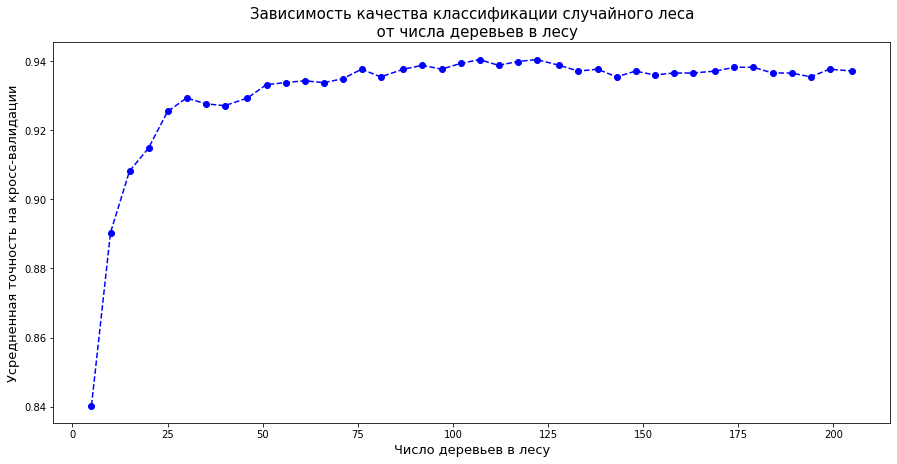

In [ ]:
plt.figure(figsize=(15,7));
plt.plot(num_of_trees, CVS_n_trees, 'bo', linestyle='--');
plt.title('Зависимость качества классификации случайного леса\n \
 от числа деревьев в лесу', fontsize=15)
plt.ylabel('Усредненная точность на кросс-валидации', fontsize=13)
plt.xlabel('Число деревьев в лесу', fontsize=13)
plt.show();

Зависимость качества классификации случайного леса от числа деревьев 

In [ ]:
n_of_features = np.linspace(1, X.shape[1]*0.66, 20).astype('int32')
CVS_n_features = np.array(
    [BORTClassifier(X, y, CV=5,
                    N_TREES=100,
                    MAX_FEATURES=n,
                    RANDOM_STATE=RND_SEED).mean() for n in n_of_features
     ]
)

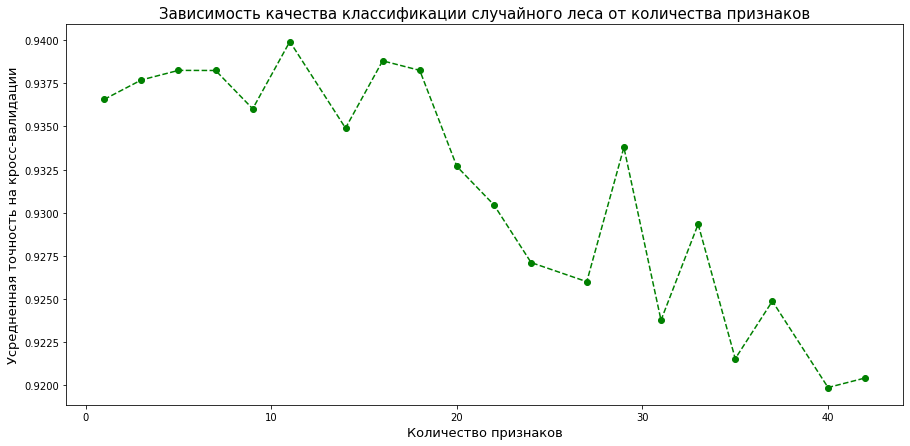

In [ ]:
plt.figure(figsize=(15,7));
plt.plot(n_of_features, CVS_n_features, 'go', linestyle='--');
plt.title('Зависимость качества классификации случайного леса от количества признаков',
          fontsize=15)
plt.ylabel('Усредненная точность на кросс-валидации', fontsize=13)
plt.xlabel('Количество признаков', fontsize=13)
plt.show();

In [ ]:
# import pandas as pd

# rf = RandomForestClassifier(random_state=42)
# rf.fit(X, y)
# pd.Series([clf.tree_.max_depth for clf in rf.estimators_]).hist()

Зависимость качества классификации случайного леса 
от ограничения на максимальную глубину деревьев

In [ ]:
max_tree_depth = np.linspace(2, 25, 23).astype('int32')
CVS_max_tree_depth = np.array(
    [BORTClassifier(X, y, CV=5,
                    N_TREES=100,
                    MAX_DEPTH=n,
                    RANDOM_STATE=RND_SEED).mean() for n in max_tree_depth
     ]
)

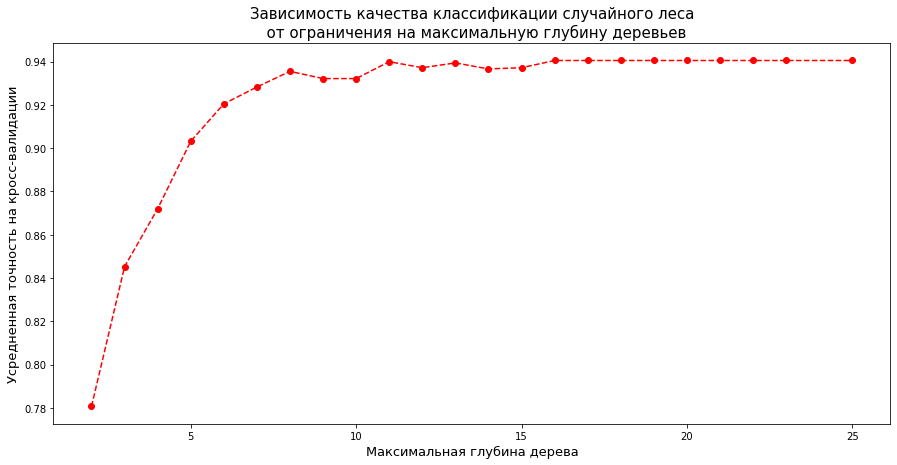

In [ ]:
plt.figure(figsize=(15,7));
plt.plot(max_tree_depth, CVS_max_tree_depth, 'ro', linestyle='--');
plt.title('Зависимость качества классификации случайного леса\n \
 от ограничения на максимальную глубину деревьев', fontsize=15)
plt.ylabel('Усредненная точность на кросс-валидации', fontsize=13)
plt.xlabel('Максимальная глубина дерева', fontsize=13)
plt.show();

 ## ML-6. Бустинг. Стекинг Machine Learning

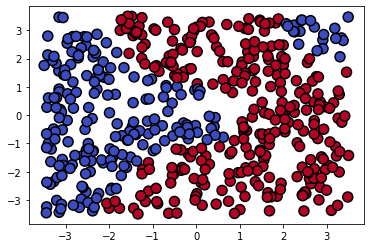

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def get_labels(data):
#     labels = []
#     for idx, item in enumerate(data):
#         if item[0]**3 + item[1]**2 < 1:
#             labels.append(0)
#         elif item[0] > 2 and item[1] > 2:
#             labels.append(0)
#         else:
#             labels.append(1)
#     return np.array(labels)

# m = 7 * np.random.random_sample((500,2)) - np.array([3.5, 3.5])
# labels = get_labels(m)

# plt.scatter(m[:, 0], m[:, 1], c=labels, s=100, 
#             cmap='coolwarm', edgecolors='black', linewidth=1.5);

### 6.4. Бустинг. Практика

#### Задание 6.4.1

Для решения первого задания урока сначала подготовим данные. Выкачаем набор данных, в котором будет прогнозировать, является ли письмо спамом.

Из столбца yesno сделайте столбец spam, где 1 соответствует значению y (является спамом), а 0 – n (не является спамом). Удалите первый столбец (с индексом) и столбец "yesno".

Комбинации признаков должны иметь вид "признак1_признак2".

У Вас остается шесть столбцов-признаков и один столбец spam, который является нашей целевой переменной. Разделим их на x и у.

Теперь мы хотим создать новые признаки путем попарного перемножения уже имеющихся друг на друга. Сколько получится признаков после преобразования (включая те шесть, которые были в исходных данных)?

In [3]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations

RND_SEED = 42

df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')
df.sample()

df['spam'] = (df['yesno'] == 'y').astype('int32')
df = df.drop(['yesno', 'Unnamed: 0'], axis=1)

X, y = df.drop('spam', axis=1), df['spam']

#добавляем переменные взаимодействия признаков вида признак1 * признак2
for comb in combinations(X, 2):
    feature_name = comb[0] + '_' + comb[1]
    X[feature_name] = X[comb[0]] * X[comb[1]]

X.shape[1]

21

#### Задание 6.4.2

Разделим получившися данные на обучающую и тестовую выборки в соотношение 80:20. Обучите модель `GradientBoostingClassifier` (из библиотеки sklearn) с параметрами по умолчанию (на момент создания урока это `learning_rate=0.1, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None`).

Во всех методах, где присутствует случайность, укажите `random_state=42`.

Это будет наш baseline. Укажите точность  на тестовой выборке (параметр score), округлив до третьего знака после точки-разделителя.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

RND_SEED = 42

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, y, test_size=0.2, random_state=RND_SEED)

gboost_clf = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators=100,
                                        max_depth=3,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        subsample=1,
                                        max_features=None,
                                        random_state=RND_SEED)
gboost_clf.fit(X_train, Y_train)
# gboost_clf.train_score_[-1]
Y_pred = gboost_clf.predict(X_test)

print(f'Точность базового градиентного бустинга:\n\
{round(accuracy_score(Y_test, Y_pred), 3)}')

Точность базового градиентного бустинга:
0.865


Воспользуйтесь методом `feature_importances_`. С его помощью вы можете оценить вклад каждого признака в обучение модели. Постройте столбчатую диаграмму, где по горизонтали указаны названия признаков, а по вертикали их важность. В ответе укажите третий по важности признак (без кавычек и пробелов).

'dollar_bang'

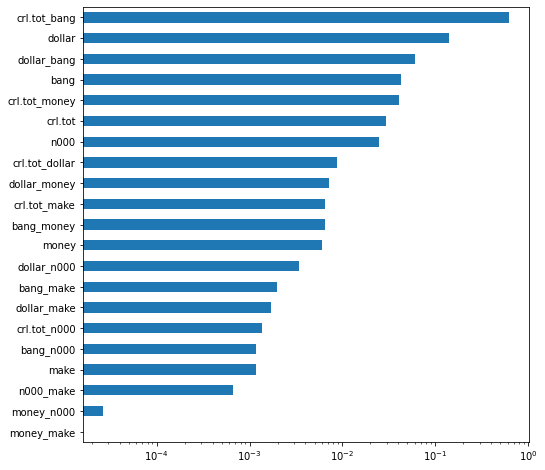

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

feat_importances = pd.Series(
    gboost_clf.feature_importances_,
    index=X.columns
).sort_values(ascending=True)

plt.figure(figsize=(8, 8));
feat_importances.plot(kind='barh', logx=True);

feat_importances.index[-3]

Теперь перейдем к подбору параметров в модели. Для этого в библиотеке `scikit-learn` есть метод `GridSearchCV`. Ему на вход подается модель, список параметров и способ оценивания. При запуске метода `fit` модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становятся та, при которой значение метрики максимально.

Укажите в качестве `estimator` градиетный бустинг с параметрами по дефолту и `random_state=42`. В параметре scoring укажите `'accuracy', n_jobs=-1, cv=5`.

Сетку параметров задайте такой:

param_grid = \
{'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],  
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}

В ответе укажите точность, округленную до трёх знаков после точки разделителя, для лучших параметров на кросс-валидации. Для этого посмотрите в документации sklearn, какой атрибут GridSearchCV за это отвечает.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
              'n_estimators':  [100, 250, 500, 750, 1000, 1250, 1500, 1750]
}

gboost_clf = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators=100,
                                        max_depth=3,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        subsample=1,
                                        max_features=None,
                                        random_state=RND_SEED)

grid_search = GridSearchCV(
    gboost_clf,
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)
grid_search.fit(X, y)

cv_score = grid_search.best_score_
print(f'Точность для лучших параметров на кросс-валидации:\n {round(cv_score, 3)}')

Точность для лучших параметров на кросс-валидации:
0.874155454845867


In [ ]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [ ]:
from sklearn.model_selection import cross_val_score

gboost_clf_best = GradientBoostingClassifier(learning_rate=0.01,
                                        n_estimators=1000,
                                        max_depth=3,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        subsample=1,
                                        max_features=None,
                                        random_state=RND_SEED)
cv_score_alt = cross_val_score(gboost_clf_best, X, y, scoring='accuracy', cv=5, n_jobs=-1).mean()
print(f'Точность для лучших параметров\n на кросс-валидации\
(альтернативное вычисление) :\n {round(cv_score_alt, 3)}')

Точность для лучших параметров
 на кросс-валидации(альтернативное вычисление) :
 0.874


#### Задание 6.4.3

Подбор параметров — незаменимый инструмент при настройке моделей. Однако, если данных очень много, а модель сложная, то иногда имеет смысл ограничить количество параметров, которые вы хотите перебрать. Если модель с одним набором параметров обучается 30 минут, а вы хотите перебрать 10 таких наборов, то стоит приготовиться к пятичасовому ожиданию. Также стоит учитывать, что размер некоторых параметров влияет на время, потраченное на обучение моделей. Например, менее глубокие деревья учатся быстрее, чем глубокие.

При использовании `GridSearchCV` перебираются все возможные способы комбинации параметров. Сколько разных моделей (моделей градиентного бустинга с разными наборами параметров) обучилось в прошлом задании?

In [ ]:
param_grid = {'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
              'n_estimators':  [100, 250, 500, 750, 1000, 1250, 1500, 1750]
}

pg_ls = list(param_grid.values()) #['learning_rate']
np.prod([len(x) for x in pg_ls])

48

Теперь воспользуемся `GridSearchCV` для подбора максимальной глубины (`max_depth`). В качестве estimator используйте градиентный бустинг с раннеее подобранными параметрами и `random_state=42`. Переберите все значения `max_depth` от 5 до 15 включительно. В ответ запишите значение параметра, при котором точность максимальна.

In [ ]:
gboost_clf_best = GradientBoostingClassifier(learning_rate=0.01,
                                        n_estimators=1000,
                                        max_depth=3,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        subsample=1,
                                        max_features=None,
                                        random_state=RND_SEED)

param_grid = {'max_depth': [i for i in range(5, 16)]}

grid_search_depth = GridSearchCV(
    gboost_clf_best, param_grid, scoring='accuracy', n_jobs=-1, cv=5
)
grid_search_depth.fit(X, y)

print(f"Лучшая точность достигается на max_depth = \
{grid_search_depth.best_params_['max_depth']}")

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  n_estimators=1000,
                                                  random_state=42,
                                                  subsample=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             scoring='accuracy')

#### Задание 6.4.4

Может показаться, что, научившись запускать готовые фукнции из библиотек и настраивать параметры, мы абсолютно готовы к работе. Однако на поле боя нас могут подстерегать еще опасности — legacy code, то есть код, написанный кем-то до вас. Может быть, его можно было бы и улучшить, но на нём уже столько всего надстроено, что переписывать всё практически невозможно.

А ещё часто будет возникать необходимость просто понять код коллеги или сделать code review (грубо говоря, это анализ кода на предмет ошибок и расхождения в стиле). Во всех этих ситуациях необходим навык быcтрого чтения кода.

Поэтому в качестве примера в этом задании мы предлагаем изучить код для реализации AdaBoost с нуля. Вам необходимо запустить эту функцию, но с дописанными строчками (вычисление ошибки и веса алгоритма) на всех признаках, получившихся после всех преобразований в предыдущем датасете (до разделения выборки на обучающую и тестовую). Параметр learning_rate возьмите равным 0.001, М = 10. В ответ запишите точность, округленную до трёх знаков после точки-разделителя.

In [5]:
from sklearn.tree import DecisionTreeClassifier

RND_SEED = 42

def AdaBoost_scratch(X, y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, \
    estimator_weight_list, sample_weight_list = [], [], [], [], []

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1,
                                           max_leaf_nodes=2,
                                           random_state=RND_SEED)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y).astype('int32')

        # Оцениваем ошибку
        estimator_error = np.sum(sample_weight * incorrect)
        
        # Вычисляем вес нового алгоритма
        estimator_weight = \
            learning_rate * np.log ((1 - estimator_error) / estimator_error)
        
        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect *\
               ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраняем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())

    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    acc = (preds == y).sum() / N
    # print('Accuracy = ', acc) 
    
    return acc, estimator_list, estimator_weight_list, sample_weight_list

accuracy, estimator_list, estimator_weight_list, sample_weight_list  = \
    AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

print('Точность алгоритма:', round(accuracy, 3) )

Точность алгоритма: 0.823
